# Assignment 1

Test whether a gaussian model N($\mu$, $\sigma$) for the age distribution of citibike drivers is a sensible model, or if you can find a better fit with another distribution.

Use 2 tests: KS, AD, KL, chisq (even though we have not talked about it in detail yet) to do this.

Test at the Normal and a least one other distributions (e.g. Poisson, or Binomial, or Chisq, Lognormal.......)

In [1]:
# import relevant modules.
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
%pylab inline

import os

Populating the interactive namespace from numpy and matplotlib


### Data Download and Prep

In [2]:
if os.getenv("PUIDATA"):
    data_path = os.getenv("PUIDATA")
else:
    os.system('mkdir data')
    data_path = "./data"

In [3]:
# function definition from Dr.Bianco's code. 
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
            os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")
    else:
        print ("file in place, you can continue")

In [4]:
datestring = '201607'  # July 2016 data is used for the study 
getCitiBikeCSV(datestring)

('Downloading', '201607')
file in place, you can continue


In [5]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head(3)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2


In [6]:
# Drop all rows where we do not have a birth year
df.dropna(inplace=True, subset=['birth year'])

In [7]:
# Generate age column
df['age'] = 2016 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [8]:
# Drop unneeded columns
df.drop(['tripduration',
         'starttime', 
         'stoptime', 
         'start station id', 
         'start station name', 
         'start station latitude',
         'start station longitude',
         'end station id', 
         'end station name', 
         'end station latitude',
         'end station longitude',
         'bikeid',
         'usertype'], axis=1, inplace=True)
df.head()

,birth year,gender,age
1,1984.0,1,32.0
2,1986.0,2,30.0
5,1991.0,1,25.0
6,1989.0,1,27.0
7,1989.0,1,27.0


In [9]:
# Riders > 80 years are discarded for this study as it mighe account for an outliners or some data issues.
df = df[df['age'] < 80]

Mean: 37.7458102226 Sigma: 11.4098284107


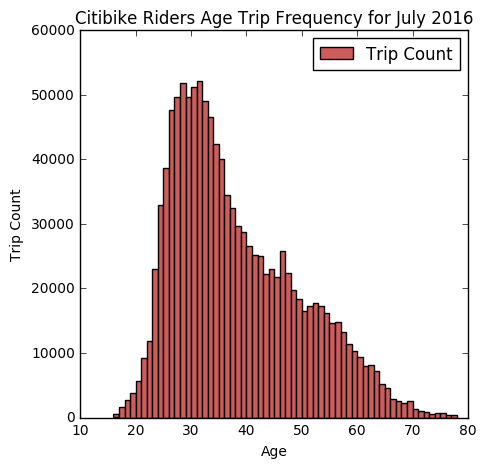

In [10]:
print 'Mean:', df.age.mean(), 'Sigma:', df.age.std()
min_age = df.age.min()
max_age = df.age.max()

#Histogram                                                                                              
bins = np.arange(min_age, max_age, 1)
plt.figure(figsize=(5,5))
plt.hist(df.age, bins, label='Trip Count', color='indianred')
plt.title('Citibike Riders Age Trip Frequency for July 2016')
plt.xlabel('Age')
plt.ylabel('Trip Count')
plt.legend()
plt.show()

### For a Normal Distribution
**Null hypothesis:** The ages of citibike users are normally distributed 

**Alternate Hypothesis:** The ages of citibike users are not Normally distributed

$F_a$ = F_Age

$F_G$ = F_Gaussian

Significance Level = 0.05 / 5%

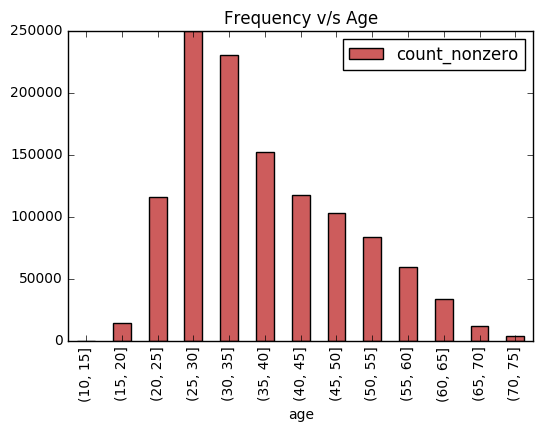

In [11]:
bins = np.arange(10,80,5)
plot = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero])\
.plot(kind='bar', legend=True, title = 'Frequency v/s Age',color='indianred')

Fit a gaussion distribution to the data

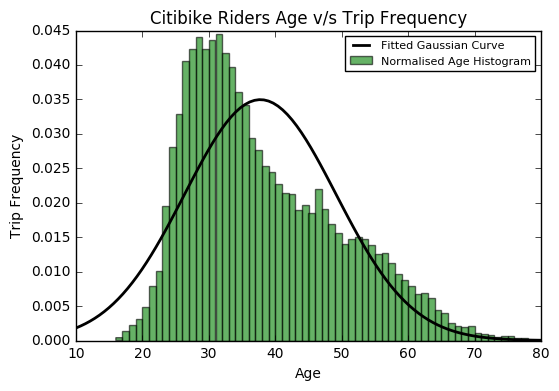

In [12]:
mu, std = scipy.stats.norm.fit(df.age)
bins = np.arange(df.age.min(), df.age.max(), 1)

#plt.hist(df_age.index.values, bins, label='Count')
plt.hist(df.age, bins, normed = True, alpha=0.6, color='g', label = 'Normalised Age Histogram')
plt.title('Citibike Riders Age v/s Trip Frequency')
plt.xlabel('Age')
plt.ylabel('Trip Frequency')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = scipy.stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label = 'Fitted Gaussian Curve')
plt.legend(loc='best', fontsize=8)

The two distributions tried are Gaussion and Exponential Distributions. 
The two test selected are Kolmogorov-Smirnov(KS) and Anderson-Darling (AD) as these were discussed in the class. 

## Kolmogorov-Smirnov (KS) Test for Gaussion Distribution

In [13]:
# KS Test against Gaussion Distribution

scipy.stats.kstest(df.age.values,'norm', args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.11492389648670298, pvalue=0.0)

#### p value of 0.0 is way less than 0.05 i.e signifinace level. Hence we can reject the null hypothesis.

## Anderson-Darling (AD) Test for Gaussion Distribution

In [14]:
scipy.stats.anderson(df.age, dist='norm')

AndersonResult(statistic=21420.84914409928, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

**At 5% significance level, the critical value is 0.787 which is very very small with our AD statistic. So again we reject the null hypothesis that citibike age distribution of drivers is similar to standard normal distribution.**

## Kolmogorov-Smirnov (KS) Test  for Exponential Distribution

In [17]:
scipy.stats.kstest(df.age.values,'expon', args=(df.age.mean(), df.age.std()))

KstestResult(statistic=0.5800437620278045, pvalue=0.0)

#### p value of 0.0 is way less than 0.05 i.e signifinace level. Hence we can reject the null hypothesis.

## Anderson-Darling (AD) Test for Exponential Distribution

In [18]:
scipy.stats.anderson(df.age, dist='expon')

AndersonResult(statistic=272123.20669708634, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

**At 5% significance level, the critical value is 1.341 which is very very small with our AD statistic. So again we reject the null hypothesis that citibike age distribution of drivers is similar to standard normal distribution.**

The null hypothesis is rejected for all the above tests and for Gaussian and Exponential distribution. Hence, we can **reject the Null Hypothesis** 